# Introduction to Neural Networks

Here we give an introduction to Neural Networks

## General Neural Network

We are going to train it using our training data and use that trained model to generate preductions using new data.

A single neuron (like Logistic Regression) only permits a linear decision boundary

<div>
    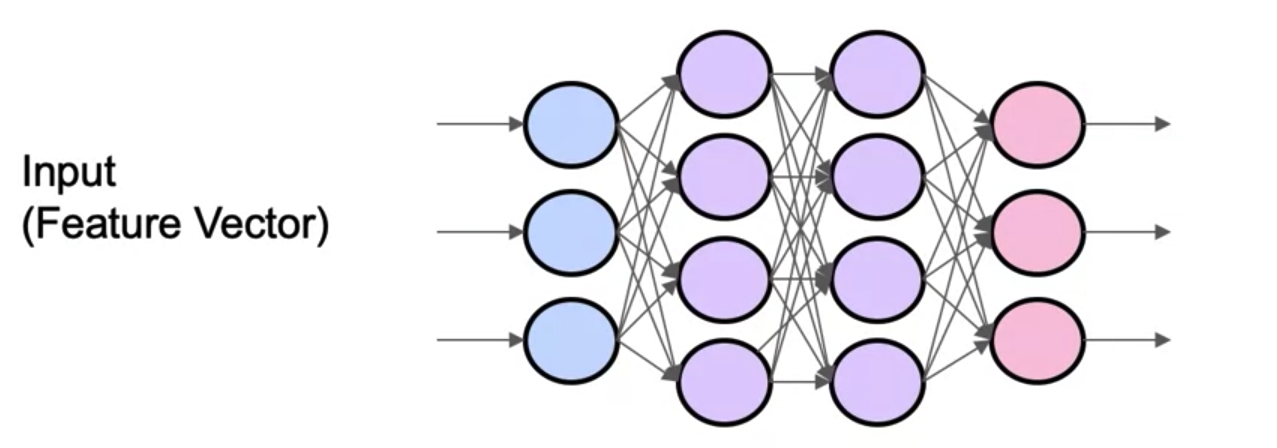
<div/>

# Perceptron

## Single Node in the Middle of a Neural Network

**Step 1:** The node will get the input values from the previous layer, wherever that node lies



**Step 2:** Those input values are then going to be combined via weights from each of those different values (similar to basic linear regression)




**Step 3:** Then that combination of weights is going to be transformed, similar to how logistic regression transforms a linear combination to squash those values between 0 and 1, and that transformed value is used as **input for the next layer**

<div>
    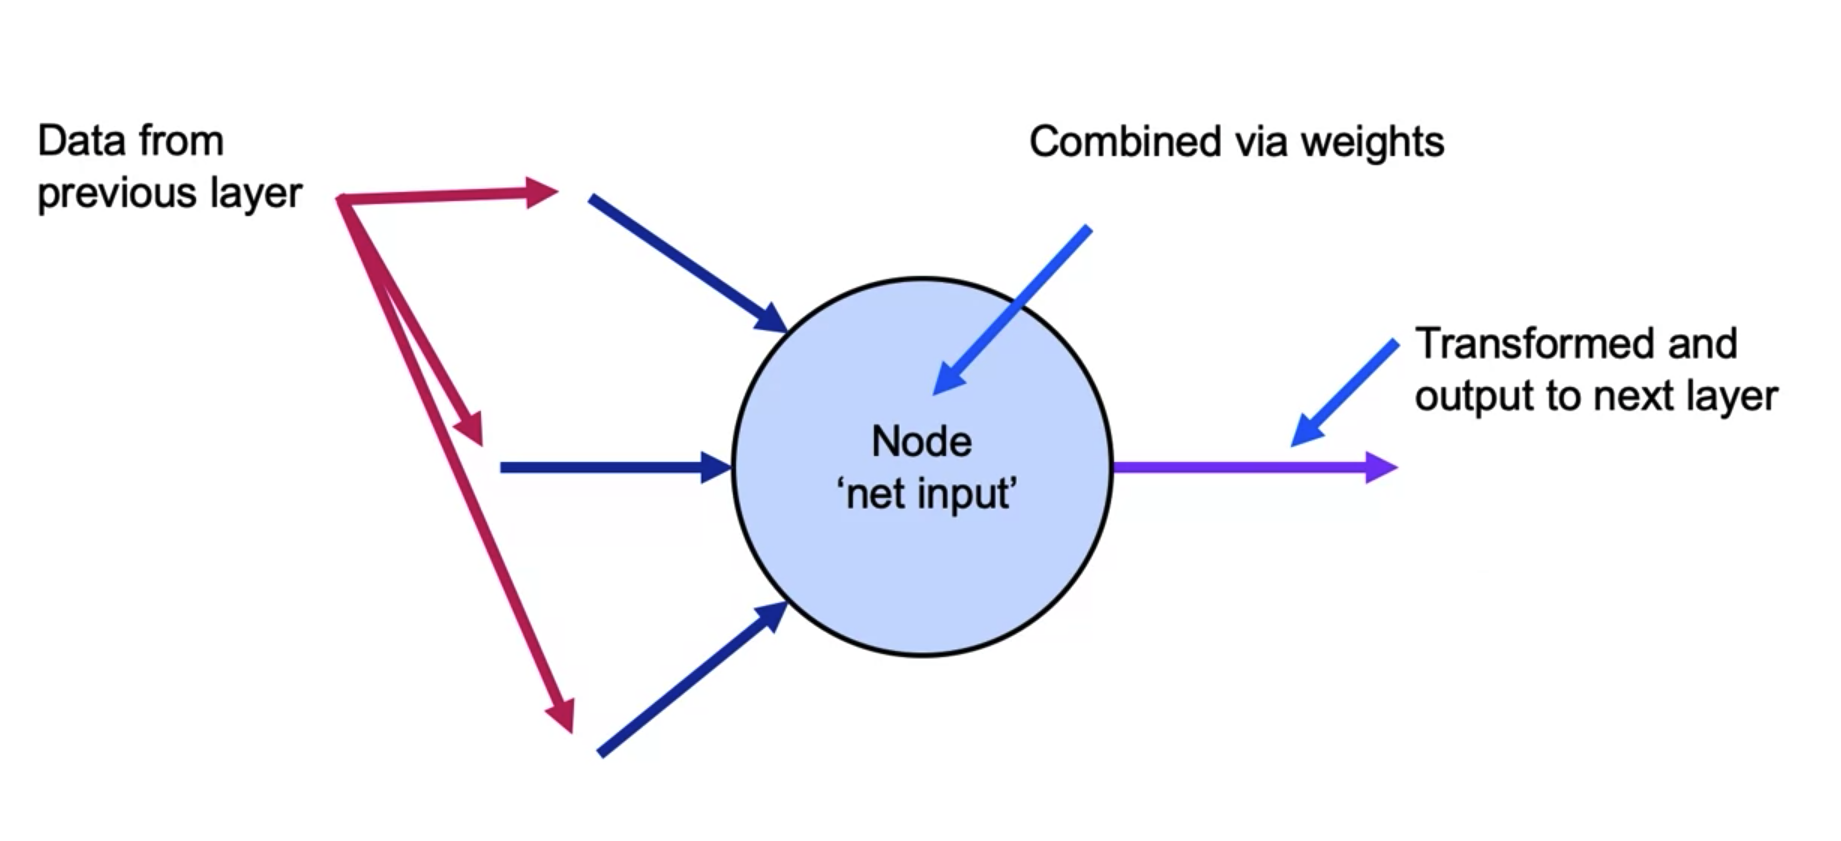
<div/>

### Mathematical View of the Node


- **Input Values:** 

$X_1, X_2, X_3$



- **Intercept:**

Assumed to be $b = 1$


- **Respective Weights:**

$W_1, W_2, W_3$


Our model is going to learn each of these **weights and b**


- **Net Input - Multiply each Value by its Weight:**

$$ Z = X_1 W_1 + X_2 W_2 + X_3 W_3 + b $$


- **Activation Function:**

$$f(z)$$

is used to transform the output and use that value as input for next layer. Without this activation function we are restricted to **only linear outputs/linear combination of our inputs**. The activation function is what allows for the great flexibility with respect to how we consider the models outputs given our model inputs using a nueral network.

<div>
    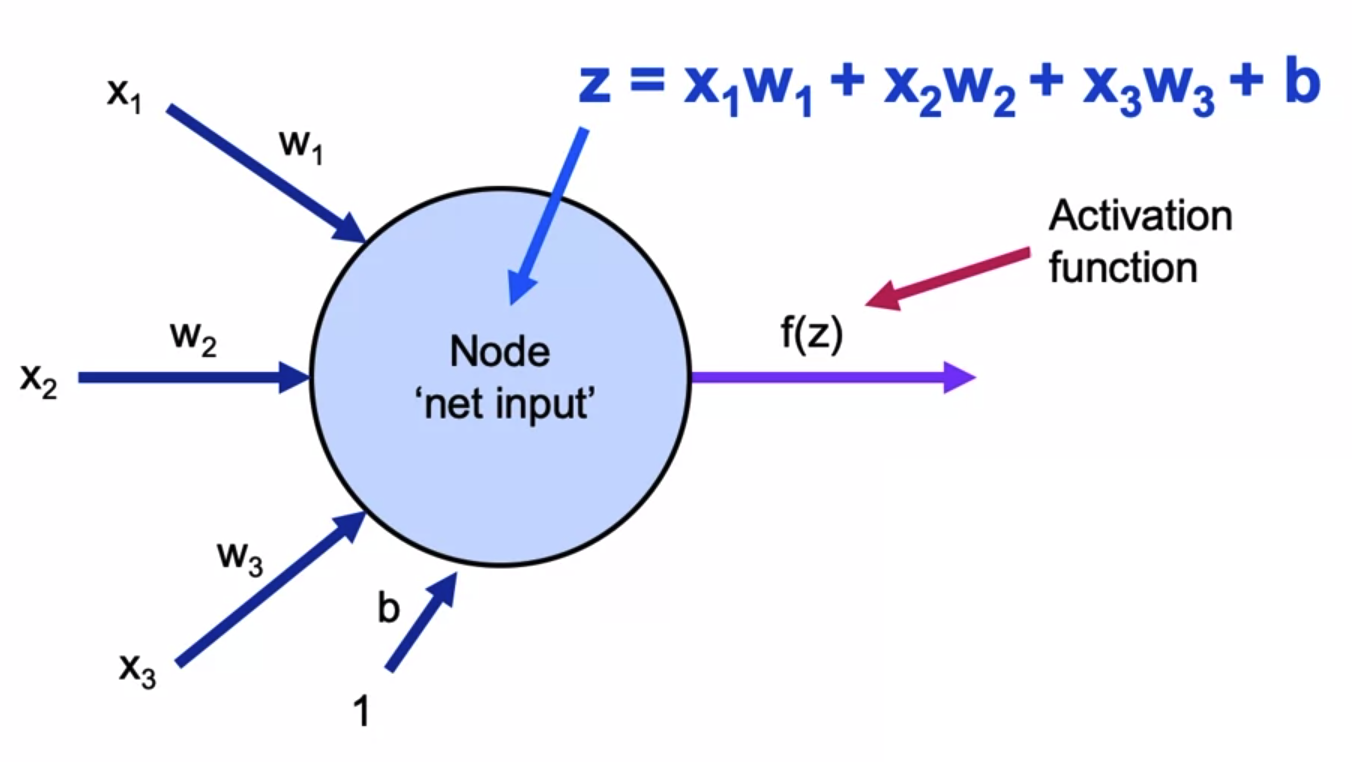
<div/>

## Vector Notation

Z = Net Input (linear combination of inputs prior to activation, i.e. output of the linear regression)


b = Bias Term


f = Activation Function (that non-linear function we use to trasnform the output of Z)


a = Output to next layer

## Relation to Neurons

<div>
    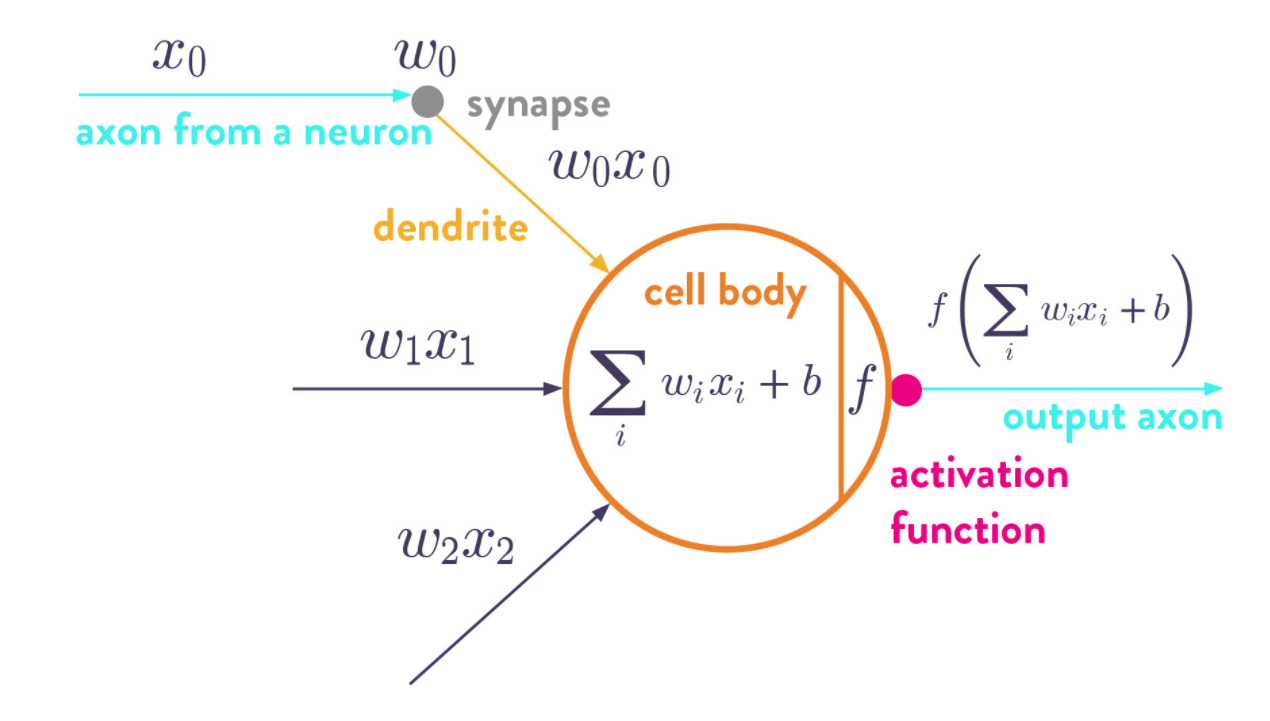
<div/>

### Relation to Logistic Regression

When we choose:

$$f(Z) = \frac{1}{1 + e^{-Z}}$$

Where Z is just going to be:

$$ Z = b + \sum_{i=1}^m x_i w_i = x_1 w_1 + ... + x_m w_m + b  $$

Then a **Neuron** is simply a *unit* of logistic regression where we have the different weights that we learn that are just the coefficients for logistic regression

- Weights $\longleftrightarrow$ Coefficients


- Inputs $\longleftrightarrow$ Variables


- Bias Term $\longleftrightarrow$ Constant Term

# Sigmoid function:

$$
\sigma = \frac{1}{1 + e^{-x}}
$$

$\sigma$ ranges from (0, 1). When the input $x$ is negative, $\sigma$ is close to 0. When $x$ is positive, $\sigma$ is close to 1. At $x=0$, $\sigma=0.5$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Quickly define the sigmoid function
def sigmoid(x):
    """Sigmoid function"""
    return 1.0 / (1.0 + np.exp(-x))

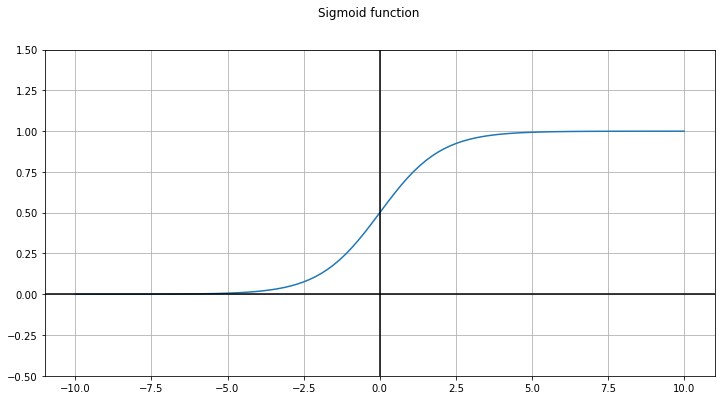

In [3]:
# Plot the sigmoid function
vals = np.linspace(-10, 10, num=100, dtype=np.float32)
activation = sigmoid(vals)
fig = plt.figure(figsize=(12,6))
fig.suptitle('Sigmoid function')
plt.plot(vals, activation)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks()
plt.ylim([-0.5, 1.5]);

## Propery of Sigmoid Function - The Quotient Rule

$$\text{Quotient Rule:} \frac{d}{dx} \frac{f(x)}{g(x)} = \frac{f'(x) g(x) - f(x) g'(x)}{g(x)^2}$$


Applied to our Sigmoid function: $\sigma(z) = \frac{1}{1+e^{-z}}$

$$ \sigma'(z) = \frac{0 - (-e^{-z})}{(1+e^{-z})^2} = \frac{e^{-z}}{(1+e^{-z})^2} = \frac{1 + e^{-z} -1}{(1+e^{-z})^2} = \frac{1 + e^{-z}}{(1+e^{-z})^2} - \frac{1}{(1+e^{-z})^2} $$

$$ = \frac{1}{1 + e^{-z}} - \frac{1}{(1 + e^{-z})^2} = \frac{1}{1 + e^{-z}} \Big( 1- \frac{1}{1 + e^{-z}} \Big) $$

$$\sigma'(z) = \sigma(z)(1-\sigma(z))$$

# Multi-Layer Perceptron

<div>
    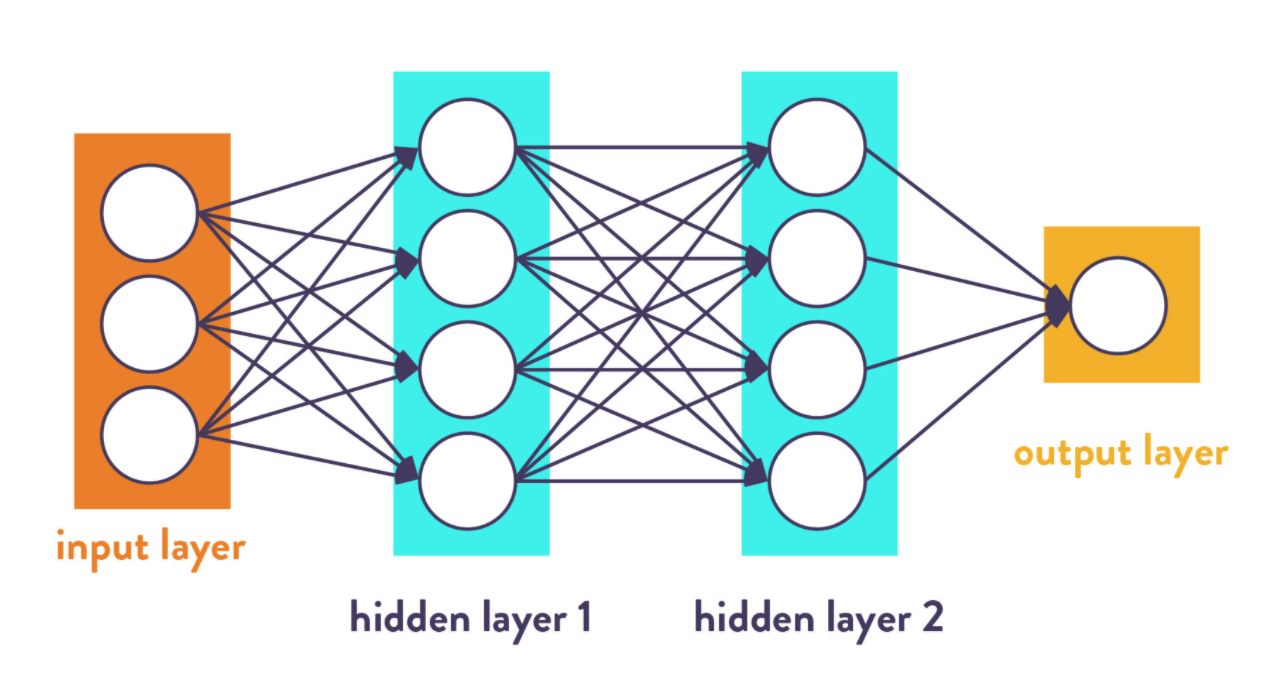
<div/>

The Figure above shows a neural network with an input layer, two hidden layers, and an output layer. This is the basic structure of all **feedforward neural networks**. The main differences are in what exactly happens in the different layers.

The output layer returns the solution of the problem we are after. 

In neural networks, one can solve one of two different problems – namely,

- **The regression problem:** where the output is continuous



- **The classification problem:** where the output is discrete;


<div>
    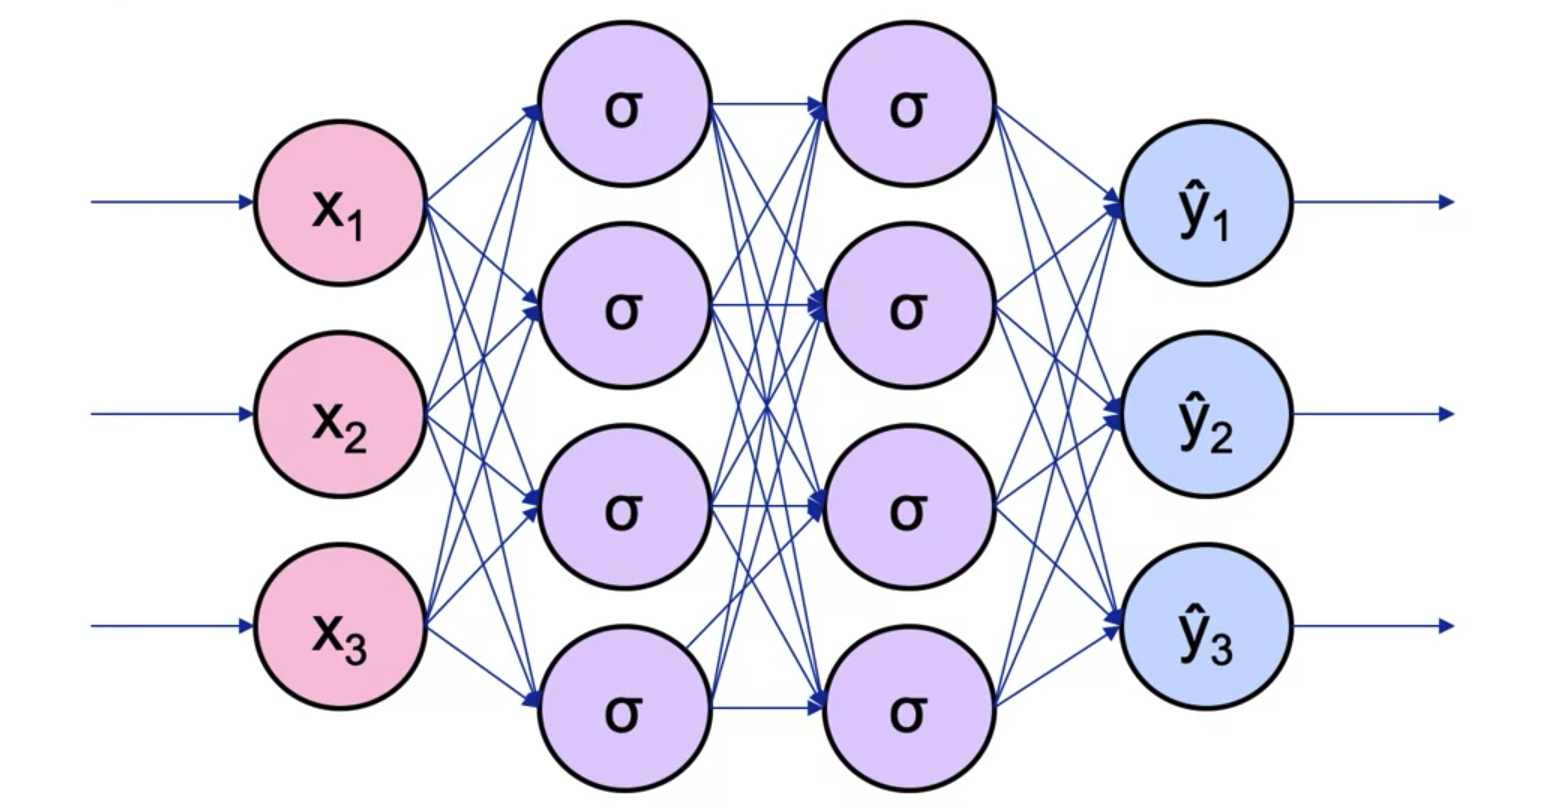
<div/>

- **Input Layer:** represents the $X$s or the Features
   
    - **Net Input** will be the sum of the weighted inputs ($Z^{i}$)


<br/>


- **Weight Layer:** weights are represented by each arrow that will conneect our inputs $X$ to each point/node within the next layer, i.e. how to combine each one of these different layers
    - The weights are represented by matrices ($W^{(i)}$) and will have to be of the appropriate shape (in this case, input shape is 3, hidden layer is 4, output layer is 3)


<br/>


- **Hidden Layers:** nodes that fall between input layer and output layer


<br/>


- **Output Layer:** represent the $\hat{y}$s
    - **Activation Functions:** ($a^{(i)}$) take the Z values and pass them through these functions to get an output

### Single Data Point

<div>
    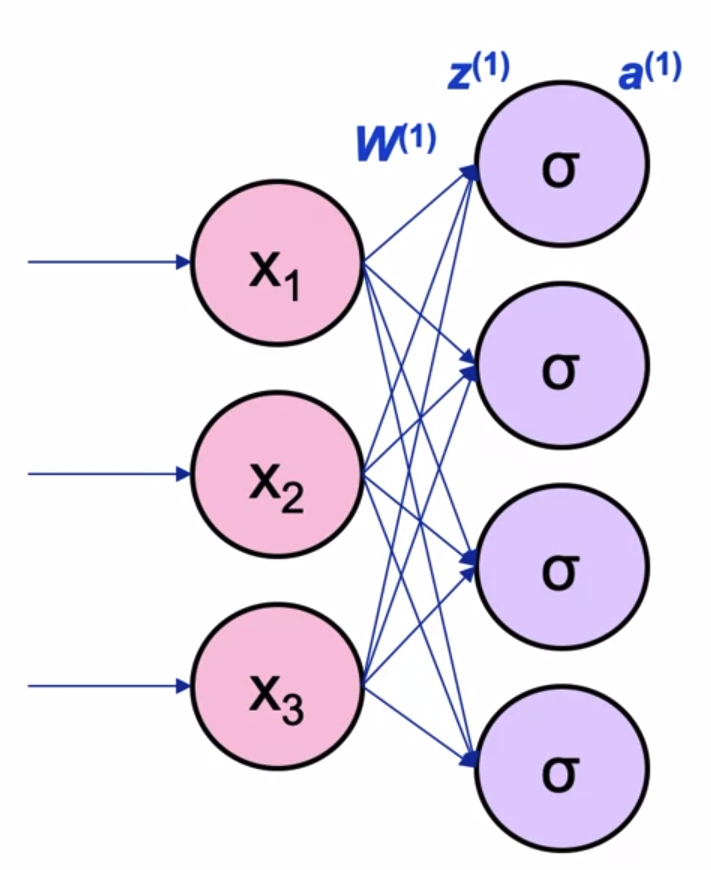
<div/>

$W^{(1)} = \begin{bmatrix} w_11 && w_12 && w_13 \\ w_21 && w_22 && w_23 \\ w_31 && w_32 && w_33 \end{bmatrix}$ is a $3 \times 4$ Matrix

<br/>

$z^{(1)} = \begin{bmatrix} z_1 \\ z_2 \\ z_3 \\ z_4 \end{bmatrix}$ is a $4-$Vector

<br/>

$a^{(1)}= \begin{bmatrix} a_1 \\ a_2 \\ a_3 \\ a_4 \end{bmatrix}$ is a $4-$Vector


with, 

$$
\left\{
    \begin{array}{ll}
        x = a^{(0)} \\
        z^{(1)} = xW^{(1)}\\
        a^{(1)} = \sigma(z^{(1)})
    \end{array}
\right.
$$


**More Generally for 3 input vectors:**

- **Input:** Matrix X (nx3 matrix with each row being a single instance)


- **Output:** Vector y (nx3 matrix with each row being a single prediction)


$$
\left\{
    \begin{array}{ll}
        z^{(1)} = xW^{(1)} \rightarrow a^{(1)} = \sigma(z^{(1)})\\
        z^{(2)} = a^{(1)}W^{(2)} \rightarrow a^{(2)} = \sigma(z^{(2)})\\
        z^{(3)} = a^{(2)}W^{(1)} \rightarrow \hat{y} = \text{softmax}(z^{(3)})\\
    \end{array}
\right.
$$

### Generalizing for nxk

<div>
    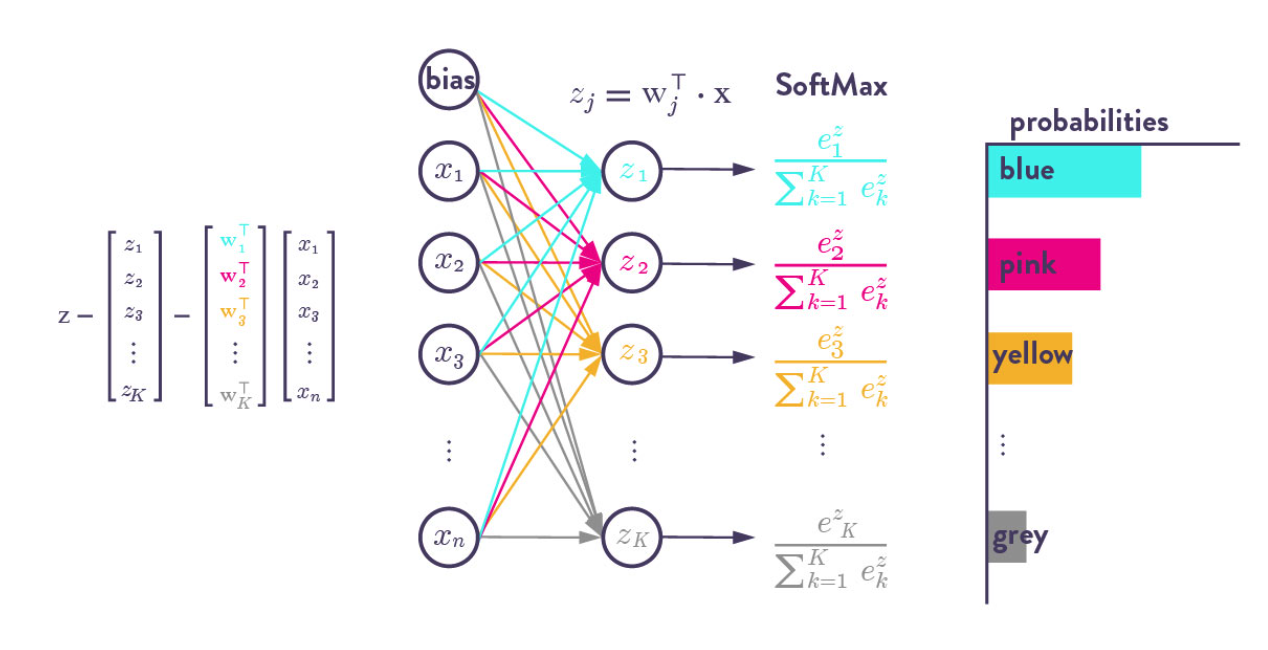
<div/>

The Figure above shows the SoftMax classifier, interpreted as a single-layer neural network.  
<br>
Let us briefly look at the ingredients again. The input is a $d$-dimensional vector $\mathbf{x}=[x_1,\ldots,x_d]^T$. The single layer is a fully connected, linear layer with neurons,
$$
z_j = \sum_{i=1}^d w_{ij}x_i + b_j,
$$
or more compactly as
$$
z_j = \mathbf{w}_j^T\mathbf{x},
$$


where we re-define $\mathbf{x}=[x_1,\ldots,x_d, 1]^T$ and $\mathbf{w}_j = [w_{1j},\ldots,w_{d,j},b_j]^T$. The *logits*, $z_j$ are then passed through the softmax function as indicated in the figure.
<br>


The SoftMax function is a perfectly good classifier, we'll continue to use it even as we extend our neural networks. The main difference will be that we will add more layers and inject nonlinearities into the layer. There are a few other things that will prove necessary, but we will cover these later. 

# Neurons as logic gates

In this exercise we will experiment with neuron computations.  We will show how to represent basic logic functions like AND, OR, and XOR using single neurons (or more complicated structures).  Finally, at the end we will walk through how to represent neural networks as a chain of matrix computations.

### Thinking of neurons as boolean logic gates

A logic gate takes in two boolean (true/false or 1/0) inputs, and returns either a 0 or 1 depending on its rule. The truth table for a logic gate shows the outputs for each combination of inputs, (0, 0), (0, 1), (1,0), and (1, 1). For example, let's look at the truth table for an "OR" gate:

### OR Gate

<table>

<tr>
<th colspan="3">OR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

A neuron that uses the sigmoid activation function outputs a value between (0, 1). This naturally leads us to think about boolean values. Imagine a neuron that takes in two inputs, $x_1$ and $x_2$, and a bias term:

![](data/logic01.png)

By limiting the inputs of $x_1$ and $x_2$ to be in $\left\{0, 1\right\}$, we can simulate the effect of logic gates with our neuron. The goal is to find the weights (represented by ? marks above), such that it returns an output close to 0 or 1 depending on the inputs.

What numbers for the weights would we need to fill in for this gate to output OR logic? Observe from the plot above that $\sigma(z)$ is close to 0 when $z$ is largely negative (around -10 or less), and is close to 1 when $z$ is largely positive (around +10 or greater).

$$
z = w_1 x_1 + w_2 x_2 + b
$$

Let's think this through:

* When $x_1$ and $x_2$ are both 0, the only value affecting $z$ is $b$. Because we want the result for (0, 0) to be close to zero, $b$ should be negative (at least -10)


* If either $x_1$ or $x_2$ is 1, we want the output to be close to 1. That means the weights associated with $x_1$ and $x_2$ should be enough to offset $b$ to the point of causing $z$ to be at least 10.


* Let's give $b$ a value of -10. How big do we need $w_1$ and $w_2$ to be? 
    * At least +20
    
    
* So let's try out $w_1=20$, $w_2=20$, and $b=-10$!

![](data/logic02.png)

In [4]:
def logic_gate(w1, w2, b):
    # Helper to create logic gate functions
    # Plug in values for weight_a, weight_b, and bias
    return lambda x1, x2: sigmoid(w1 * x1 + w2 * x2 + b)

def test(gate):
    # Helper function to test out our weight functions.
    for a, b in (0, 0), (0, 1), (1, 0), (1, 1):
        print("{}, {}: {}".format(a, b, np.round(gate(a, b))))

In [5]:
or_gate = logic_gate(20, 20, -10)
test(or_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 1.0


<table>

<tr>
<th colspan="3">OR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

This matches! Great! Now you try finding the appropriate weight values for each truth table. Try not to guess and check- think through it logically and try to derive values that work.

### AND Gate

<table>

<tr>
<th colspan="3">AND gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

## Exercise 1
Determine what values for the neurons would make this function as an AND gate.

In [6]:
# Fill in the w1, w2, and b parameters such that 
# the truth table matches
w1 = 11
w2 = 10
b = -20
and_gate = logic_gate(w1, w2, b)
test(and_gate)

0, 0: 0.0
0, 1: 0.0
1, 0: 0.0
1, 1: 1.0


## Exercise 2
Do the same for the NOR gate and the NAND gate.

### NOR (Not Or) Gate

<table>

<tr>
<th colspan="3">NOR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>

</table>

In [7]:
# Fill in the w1, w2, and b parameters such that the 
# truth table matches
w1 = -20
w2 = -20
b = 10
nor_gate = logic_gate(w1, w2, b)

test(nor_gate)

0, 0: 1.0
0, 1: 0.0
1, 0: 0.0
1, 1: 0.0


### NAND (Not And) Gate

<table>

<tr>
<th colspan="3">NAND gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>

</table>

In [8]:
# Fill in the w1, w2, and b parameters such that the 
# truth table matches
w1 = -11
w2 = -10
b = 20
nand_gate = logic_gate(w1, w2, b)

test(nand_gate)

0, 0: 1.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


## The limits of single neurons

If you've taken computer science courses, you may know that the XOR gates are the basis of computation. They can be used as so-called "half-adders", the foundation of being able to add numbers together. Here's the truth table for XOR:

### XOR (Exclusive Or) Gate

<table>

<tr>
<th colspan="3">XOR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>

</table>

Can we create a set of weights such that a single neuron can output this property?

It turns out we cannot, since single neurons can't correlate inputs. Can we still use neurons to somehow form an XOR gate?

What if we tried something more complex:

![](data/logic03.png)

Here, we've got the inputs going to two separate gates: the top neuron is an OR gate, and the bottom is a NAND gate. The output of these gates then get passed to another neuron, which is an AND gate. If you work out the outputs at each combination of input values, you'll see that this is an XOR gate.

In [9]:
# Make sure we have or_gate, nand_gate, and and_gate working from above!
def xor_gate(a, b):
    c = or_gate(a, b)
    d = nand_gate(a, b)
    return and_gate(c, d)
test(xor_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


## Feedforward Networks as Matrix Computations

We discussed previously how the feed-forward computation of a neural network can be thought of as matrix calculations and activation functions.  We will do some actual computations with matrices to see this in action.

![](data/FF_NN.png)

## Exercise 3
Provided below are the following:

- Three weight matrices `W_1`, `W_2` and `W_3` representing the weights in each layer.  The convention for these matrices is that each $W_{i,j}$ gives the weight from neuron $i$ in the previous (left) layer to neuron $j$ in the next (right) layer. 


- A vector `x_in` representing a single input and a matrix `x_mat_in` representing 7 different inputs.


- Two functions: `soft_max_vec` and `soft_max_mat` which apply the soft_max function to a single vector, and row-wise to a matrix.

The goals for this exercise are:
1. For input `x_in` calculate the inputs and outputs to each layer (assuming sigmoid activations for the middle two layers and soft_max output for the final layer.


2. Write a function that does the entire neural network calculation for a single input


3. Write a function that does the entire neural network calculation for a matrix of inputs, where each row is a single input.


4. Test your functions on `x_in` and `x_mat_in`.

This illustrates what happens in a NN during one single forward pass. Roughly speaking, after this forward pass, it remains to compare the output of the network to the known truth values, compute the gradient of the loss function and adjust the weight matrices `W_1`, `W_2` and `W_3` accordingly, and iterate. Hopefully this process will result in better weight matrices and our loss will be smaller afterwards.

In [10]:
W_1 = np.array([[2,-1,1,4],[-1,2,-3,1],[3,-2,-1,5]])
W_2 = np.array([[3,1,-2,1],[-2,4,1,-4],[-1,-3,2,-5],[3,1,1,1]])
W_3 = np.array([[-1,3,-2],[1,-1,-3],[3,-2,2],[1,2,1]])
x_in = np.array([.5,.8,.2])
x_mat_in = np.array([[.5,.8,.2],[.1,.9,.6],[.2,.2,.3],
                     [.6,.1,.9],[.5,.5,.4],[.9,.1,.9],[.1,.8,.7]])

def soft_max_vec(vec):
    return np.exp(vec)/(np.sum(np.exp(vec)))

def soft_max_mat(mat):
    return np.exp(mat)/(np.sum(np.exp(mat),axis=1).reshape(-1,1))

print('the matrix W_1\n')
print(W_1)
print('-'*30)
print('vector input x_in\n')
print(x_in)
print ('-'*30)
print('matrix input x_mat_in -- starts with the vector `x_in`\n')
print(x_mat_in)

the matrix W_1

[[ 2 -1  1  4]
 [-1  2 -3  1]
 [ 3 -2 -1  5]]
------------------------------
vector input x_in

[0.5 0.8 0.2]
------------------------------
matrix input x_mat_in -- starts with the vector `x_in`

[[0.5 0.8 0.2]
 [0.1 0.9 0.6]
 [0.2 0.2 0.3]
 [0.6 0.1 0.9]
 [0.5 0.5 0.4]
 [0.9 0.1 0.9]
 [0.1 0.8 0.7]]


In [11]:
z_2 = np.dot(x_in,W_1)
z_2

array([ 0.8,  0.7, -2.1,  3.8])

In [12]:
a_2 = sigmoid(z_2)
a_2

array([0.68997448, 0.66818777, 0.10909682, 0.97811873])

In [13]:
z_3 = np.dot(a_2,W_2)
z_3

array([ 3.55880727,  4.01355384,  0.48455118, -1.55014198])

In [14]:
a_3 = sigmoid(z_3)
a_3

array([0.97231549, 0.98225163, 0.61882199, 0.17506576])

In [15]:
z_4 = np.dot(a_3,W_3)
z_4

array([ 2.04146788,  1.04718238, -3.47867612])

In [16]:
y_out = soft_max_vec(z_4)
y_out

array([0.72780576, 0.26927918, 0.00291506])

In [17]:
## A one-line function to do the entire neural net computation

def nn_comp_vec(x):
    return soft_max_vec(sigmoid(sigmoid(np.dot(x,W_1)).dot(W_2)).dot(W_3))

def nn_comp_mat(x):
    return soft_max_mat(sigmoid(sigmoid(np.dot(x,W_1)).dot(W_2)).dot(W_3))

In [18]:
nn_comp_vec(x_in)

array([0.72780576, 0.26927918, 0.00291506])

In [19]:
nn_comp_mat(x_mat_in)

array([[0.72780576, 0.26927918, 0.00291506],
       [0.62054212, 0.37682531, 0.00263257],
       [0.69267581, 0.30361576, 0.00370844],
       [0.36618794, 0.63016955, 0.00364252],
       [0.57199769, 0.4251982 , 0.00280411],
       [0.38373781, 0.61163804, 0.00462415],
       [0.52510443, 0.4725011 , 0.00239447]])

# Neural Networks in TensorFlow

In [20]:
import IPython.display
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.facecolor'] = "0.92"

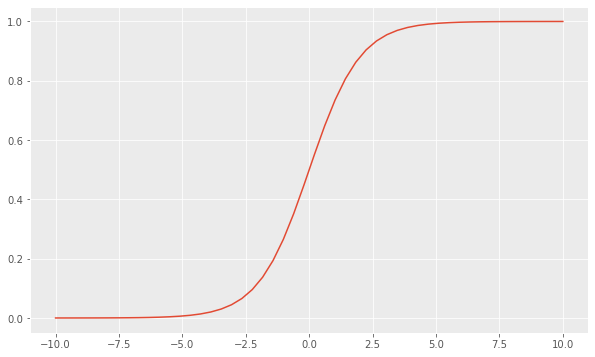

In [21]:
# The sigmoid funtion.
def σ(x):
    "Logistic sigmoid"
    return 1 / ( 1 + np.exp(-x))

x = np.linspace(-10, 10)
plt.plot(x, σ(x));

---
## A neural network as universal approximator.

The function that we will try and approximate is given by,

$$
f(x) = 0.2 + 0.4x^2 + 0.3x\sin(15x) + 0.05 \cos(50x).
$$

**Example**

Let us see how we can approximate the following function, using TensorFlow.

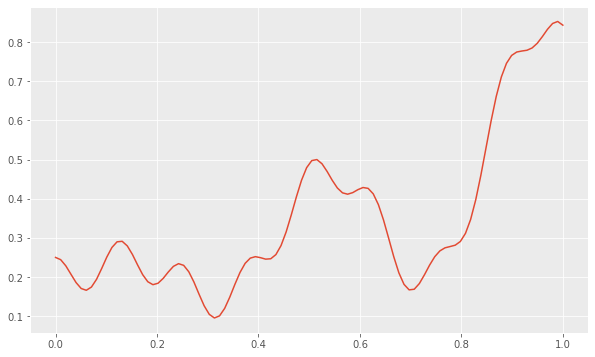

In [22]:
def f(x):
     return 0.2 + 0.4 * x**2 + 0.3 * x * np.sin(15 * x) + 0.05 * np.cos(50 * x)
    
resolution = 100
x = np.linspace(0,1,resolution)
y = f(x)

# Plot
plt.plot(x,y)
plt.show()# The neural network.

**The neural network.**

The neural network we'll use consists of the following:

1. Single hidden layer with sigmoid activations.


2. Input:  **x = np.linspace(0, 1 ,100)**


3. Neural network output: $\sigma(w \mathbf{x} + \mathbf{b})$, where $\mathbf{b}$ is a vector of offsets.


4. Target output:  $\mathbf{y} = f(\mathbf{x})$.

* For simplicity we use only a single, tied weight $w$ which we fix at $w=100$.
* Each neuron in the single hidden layer is therefore given by 
$$  z_j = \sigma(w*\mathbf{x} + b_j).$$ 
 

 

Let us see what kind of flexibility this network allows us.

**Note**: that we are not trying to fit the function yet, we are just looking at the shape of the hidden neurons. 

In [27]:
tf.compat.v1.disable_eager_execution()

### Set up the computational graph

#### Construction phase

In [28]:
tf.compat.v1.reset_default_graph()    

x = np.linspace(0.0, 1.0, resolution, dtype=np.float32)  # The input values. 
x = x[:, np.newaxis]  # The additional axis is added so that the broadcasting below works correctly
n_neurons = 2 * 5      # The number of hidden neurons. For convenience we want it to be an even number.

w = tf.constant(100.)          # Set it at a reasonably large value. 
b = -w * tf.constant(np.linspace(0.0, 1.0, n_neurons, dtype=np.float32)) 

# Note that the biases b shift the sigmoid function to the right.
# We'll illustrate this below. 

x_ = tf.compat.v1.placeholder(tf.float32)
out = tf.nn.sigmoid(w*x_+b)
init_op = tf.compat.v1.global_variables_initializer()

#### Execution phase (run session)

In [29]:
with tf.compat.v1.Session() as sess:
    sess.run(init_op)
    z = sess.run(out,feed_dict={x_:x})

2021-09-24 18:42:19.712326: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


#### Display the neurons in the hidden layer

In [30]:
from ipywidgets import interact

def show_neurons(k=0):
    """
    Display the neurons in the hidden layer
    """
    plt.plot(x, z[:, k])  
    plt.show()
    
w = interact(show_neurons, k =(0, n_neurons-1)) 

interactive(children=(IntSlider(value=0, description='k', max=9), Output()), _dom_classes=('widget-interact',)…

**Conclusion:**
The different neurons are just translated sigmoid functions.

### Combining the hidden neurons

The given function can be approximated by appropriately combining the different neurons:

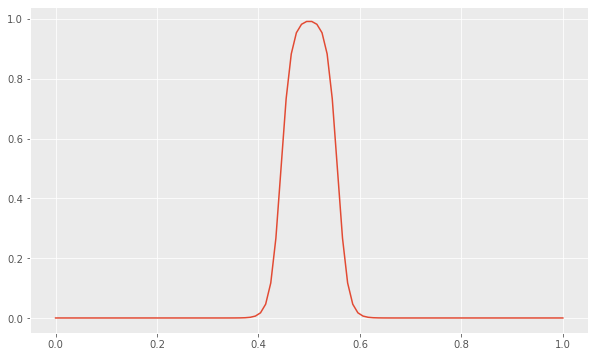

In [31]:
plt.plot(x, z[:, 4] - z[:, 5])
plt.show()

**Note:** This looks a bit like a piecewise constant function.

### Combine pairwise

In [0]:
def show_combined(k=0):
    """
    Display the neurons in the hidden layer
    """
    plt.plot(x, z[:, k] - z[:, k + 1])  
    plt.show()
    
w = interact(show_combined, k =(0, n_neurons - 2)) 

### Train the network to approximate the function above

Train for the heights of the *piecewise constant* functions (above).


Cost: 0.07819714


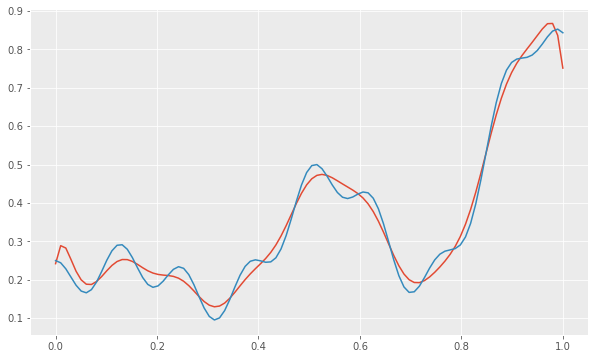

In [35]:
tf.compat.v1.reset_default_graph()

n_neurons = 2 * 50     # Specify an even number
x = np.linspace(0.0, 1.0, resolution,dtype=np.float32)
x = x[:,np.newaxis]

w = tf.constant(100.0)  # This defines the `steepness' of the sigmoid.
                       # We want to have it steep in order to approximate a 
                       # piecewise constant function.
        
b = -w * tf.constant(np.linspace(0.0, 1.0 , n_neurons, dtype=np.float32))

j = [i for i in range(n_neurons)]
q = np.ones(n_neurons)
q[1::2] = -q[1::2]
q = np.array(q, dtype=np.float32)
w1 = tf.Variable(q)

x_ = tf.compat.v1.placeholder(tf.float32)
y_ = tf.compat.v1.placeholder(tf.float32)

out1 = tf.nn.sigmoid(w * x_ + b) * w1
out = tf.reduce_sum(out1, axis=1)
cost = tf.reduce_sum((out-y_)**2)

train_step = tf.compat.v1.train.GradientDescentOptimizer(0.0001).minimize(cost)

init_op = tf.compat.v1.global_variables_initializer()
with tf.compat.v1.Session() as sess:
    sess.run(init_op)
    for i in range(1000):
        train_step.run(feed_dict={x_: x, y_: y})
        
    z = sess.run(out,feed_dict={x_:x})
    err = sess.run(cost,feed_dict={x_:x,y_:y})
    weight = sess.run(w1)
    offset = sess.run(b)

# Plot and print cost
print('Cost:',err)  
plt.plot(x,z,x,y)
plt.show()

**Conclusion**: Although a little smoothed out, we indeed get a reasonable approximation of the original function.

# Other Activation Functions

## 1. Hyperbolic Tangent Function (tanch)

$$ tanh(z) = \frac{\sinh(z)}{\cosh(z)} = \frac{e^{2x}-1}{e^{2x}+1} $$

$$ \tanh(0) = 0 $$
$$ \tanh(\infty) = 1 $$
$$ \tanh(-\infty) = -1 $$

<div>
    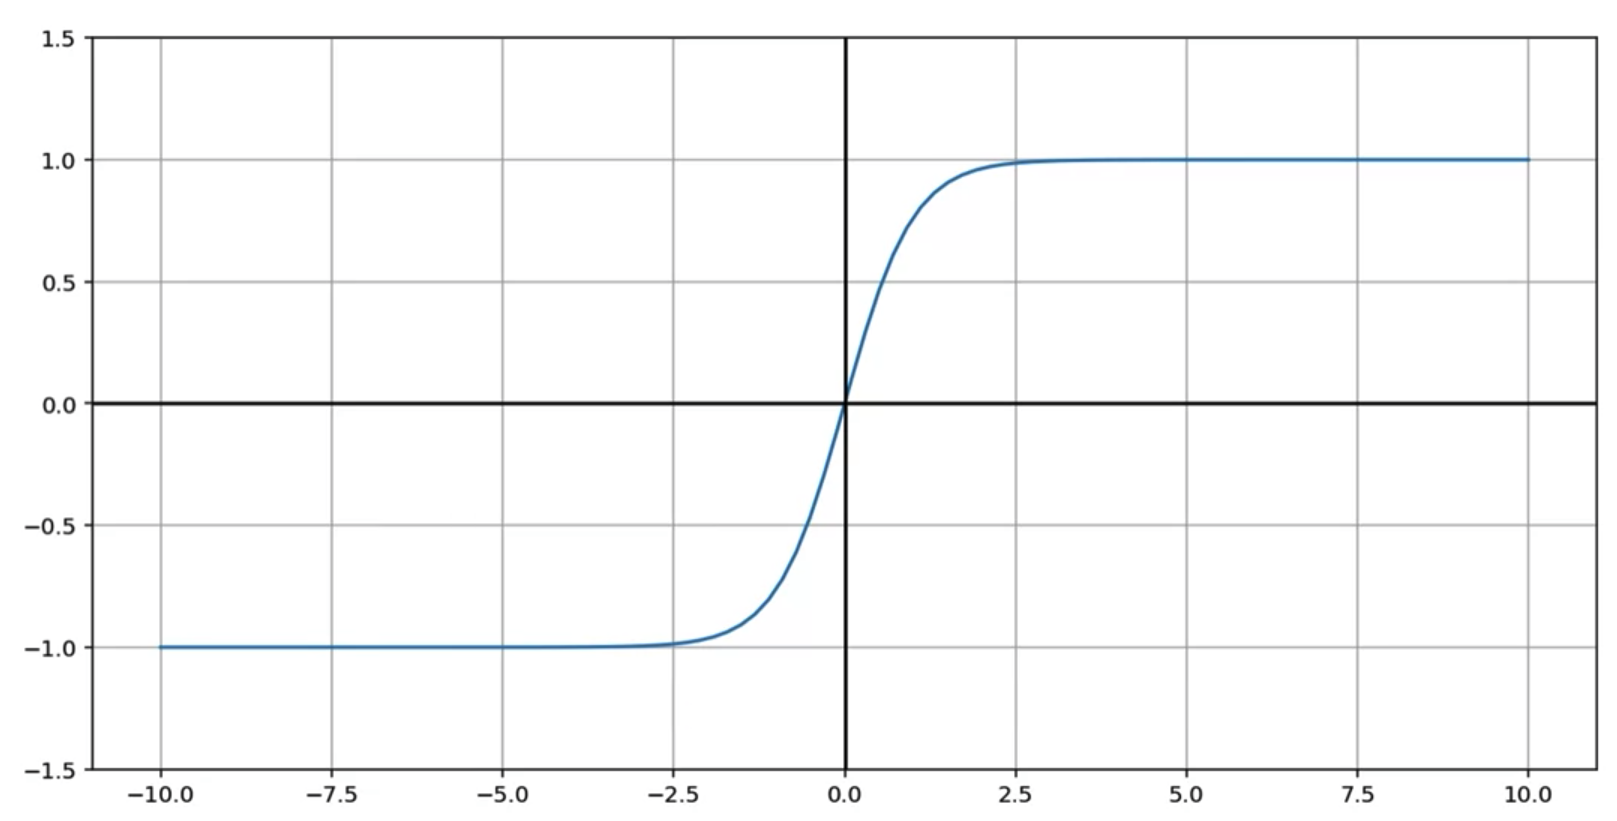
<div />

Similar to the sigmoid function but a bit stretched out.

For values between negative 2 and 2 we have a **sharper slope** with the derivative being a bit larger (a small change in x equals a larger change in y) and **gradient descent** may work a bit faster when working with this activation function.

Still have problem (as with the Sigmoid) of **very small derivatives for higher absolute values** i.e. the **Vanishing Gradient Problem**

## 2. Rectified Linear Unit (ReLU)

In order to solve the **vanishing gradient problem** we can introduce ReLu where we take the maximum value between the output z and 0.

$$\text{ReLU}(z) = \left\{
    \begin{array}{ll}
        0, \ < 0 \\
        z, z \geq 0
    \end{array}
\right. = \max(0,z) $$

$$\text{ReLU}(0) = 0$$
$$\text{ReLU}(z) = z, \text{ for } (z >> 0)$$
$$\text{ReLU}(-z) = 0$$

<div>
    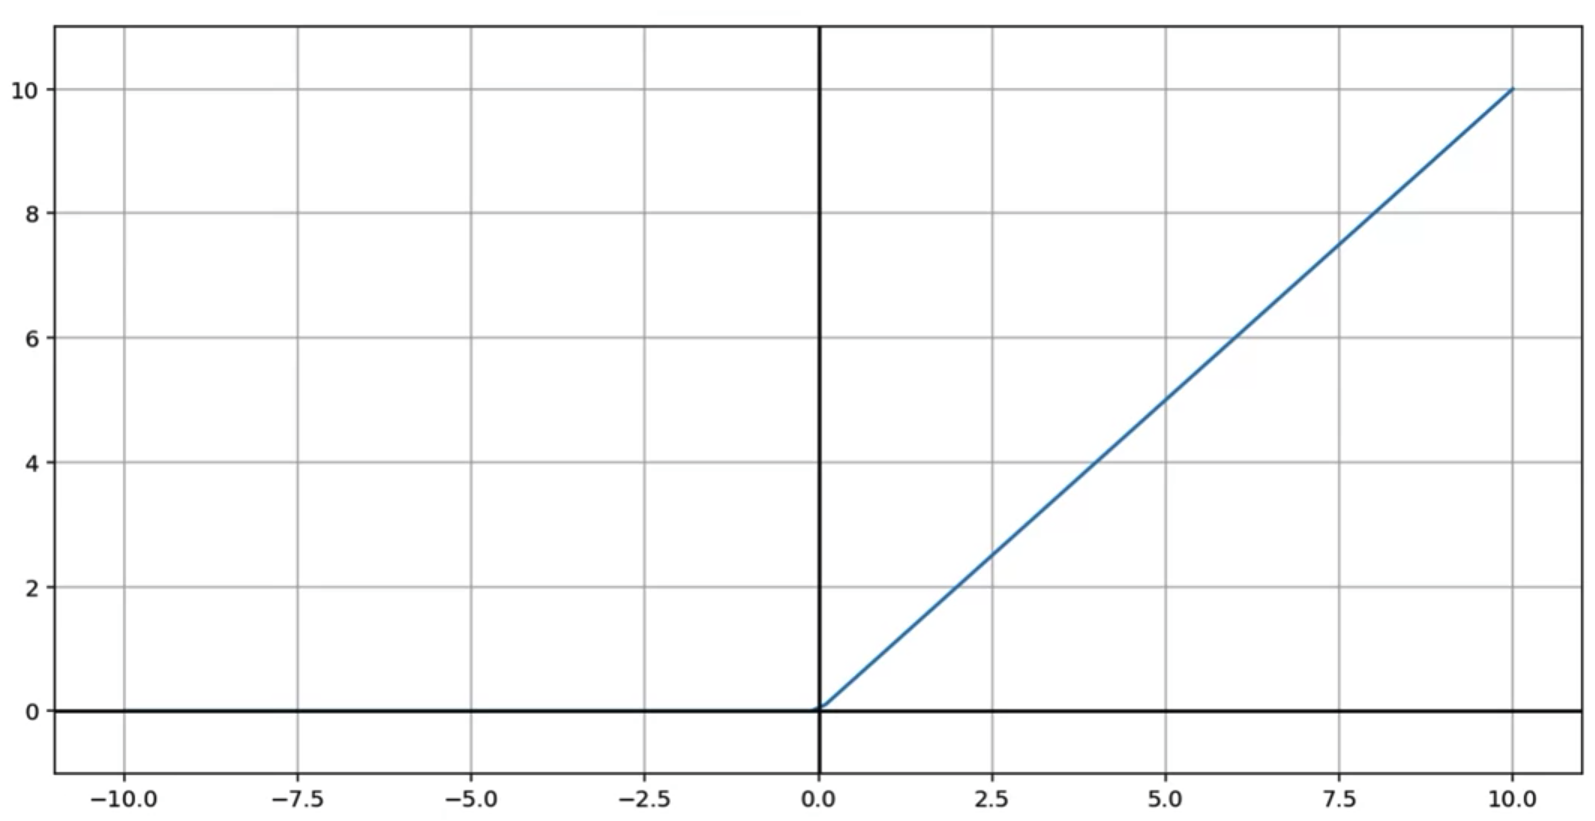
<div />

On the left hand-side now we have zero change instead of having vanishing change. So these values will actually zero out particular nodes allowing us to igore noed that **may not be providing much extra information** 

There will be however no learning at those zeroed out nodes.

## 3. Leaky Rectified Linear Unit (LReLU)

For positive values, the function remains the same but for negative values, instead of simply zeroing out $z$, we multiply that negative value by some small number $\alpha$ which will be the new output rather than just having zero.

$$\text{ReLU}(z) = \left\{
    \begin{array}{ll}
        \alpha z, \ < 0 \\
        z, z \geq 0
    \end{array}
\right. = \max(\alpha z,z); \text{ for } (\alpha < 1) $$

$$\text{ReLU}(0) = 0$$
$$\text{ReLU}(z) = z, \text{ for } (z >> 0)$$
$$\text{ReLU}(-z) = - \alpha z$$

<div>
    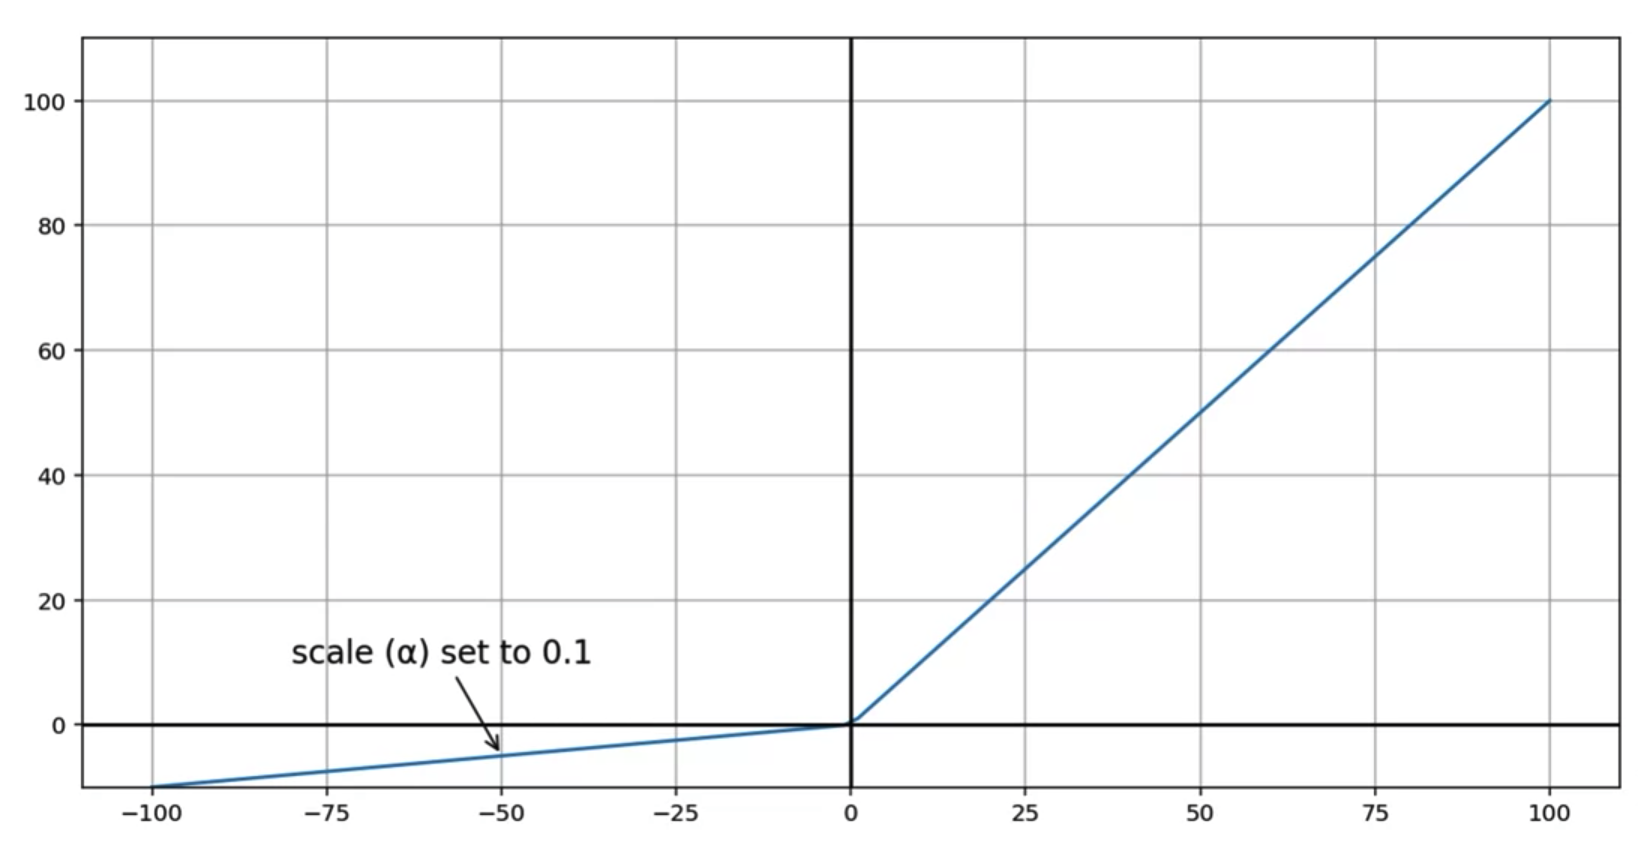
<div />

## Summary

| Method | Use Case |
| -- | -- |
| Sigmoid Activation | Useful when ouctomes should be in (0,1), suffers from vanishing gradient issues |
| Hyperbolic Tangent | Useful when ouctomes should be in (-1,1), suffers from vanishing gradient issues |
| ReLU | Useful to capture large effects, does not suffer from vanishing gradient |
| Leaky ReLU | Acts like ReLU, but allows for negative outcomes |